<a href="https://colab.research.google.com/github/NicolasCanonico/am-fatec-2025-turma2/blob/main/Atividade1302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Análise de Dados 13/03

## Importação de Bibliotecas

In [ ]:
!pip install plotly --upgrade
!pip install squarify --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 69.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Carregamento do Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_credit = pd.read_csv('/content/drive/MyDrive/am5t2/credit_data.csv')
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


## 1 - Entendendo a Estrutura dos Dados

### Exibindo primeiras linhas

In [ ]:
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


### Verificando tipos de variáveis

In [ ]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


### Identificando valores nulos ou inconsistentes

In [ ]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


## 2 - Análise Estatística Geral

### Calcule médias, medianas, desvios padrão e distribuições das principais variáveis numéricas.

In [ ]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


### Identifique a presença de outliers e distribuições assimétricas.

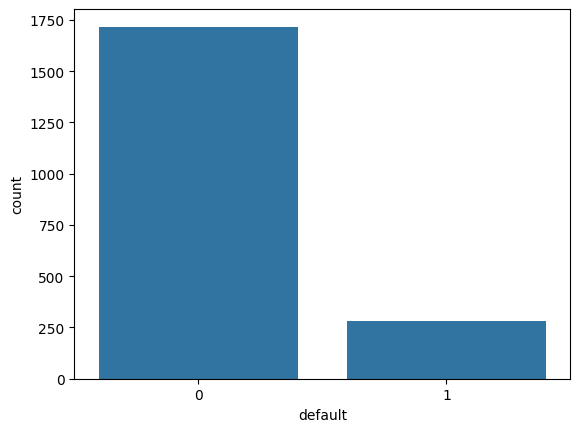

In [ ]:
sns.countplot(x = base_credit['default']);

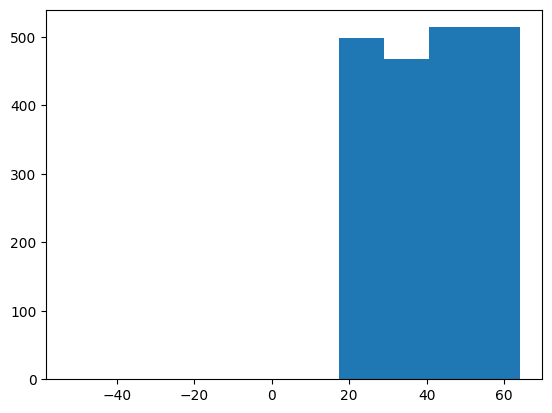

In [ ]:
plt.hist(x = base_credit['age']);

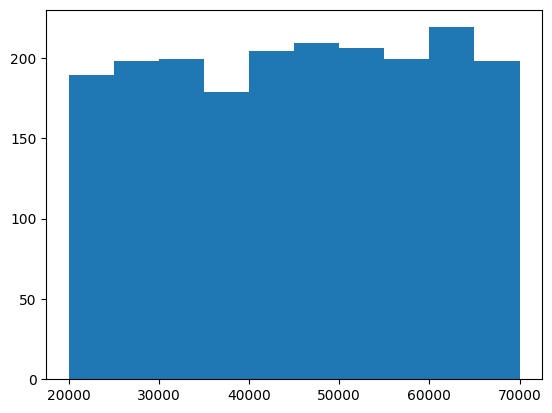

In [ ]:
plt.hist(x = base_credit['income']);

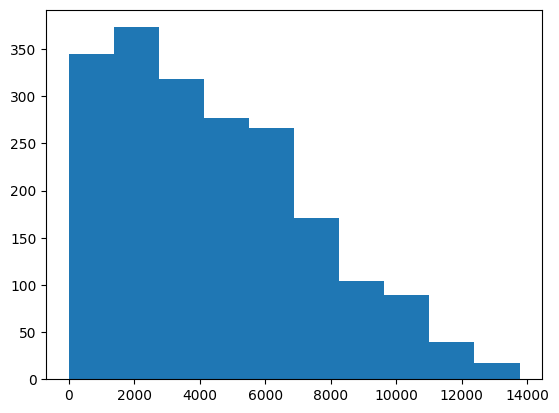

In [ ]:
plt.hist(x = base_credit['loan']);

In [ ]:
grafico_cruzado = px.scatter_matrix(base_credit, dimensions=['age','income','loan'], color='default')
grafico_cruzado.show()

#### Corrigindo os outliers

In [ ]:
base_credit['age'].mean()

40.927519966732014

In [ ]:
base_credit.loc[base_credit['age']<0,'age'] = base_credit['age'].mean()

In [ ]:
base_credit.loc[base_credit['age']<0,'age']

,age


In [ ]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [ ]:
media_idade = base_credit['age'].mean()
base_credit['age'].fillna(media_idade, inplace=True)

<ipython-input-52-0abb86d8388a>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,0
loan,0
default,0


## 3 - Correlação Entre Variáveis

### Utilize um mapa de calor (heatmap) para visualizar as correlações entre os atributos.

<Axes: >

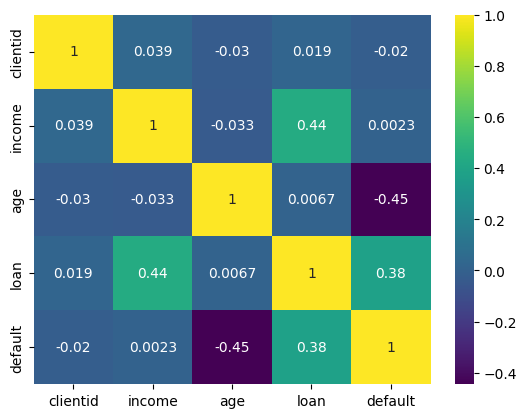

In [ ]:
sns.heatmap(base_credit.corr(), annot=True, cmap='viridis')

### Identifique quais variáveis têm maior impacto no risco de crédito.

####  
*   Idade tem a maior correlação negativa com "default", exibindo que clientes mais velhos tendem a ter menor risco de inadimplência.
*   Empréstimo tem uma correlação positiva com "default", exibindo que empréstimos mais altos possuem um maior risco de inadimplência.

## 4 - Distribuição de Clientes Aprovados e Negados

### Crie gráficos de barras para visualizar a proporção de clientes aprovados e negados.

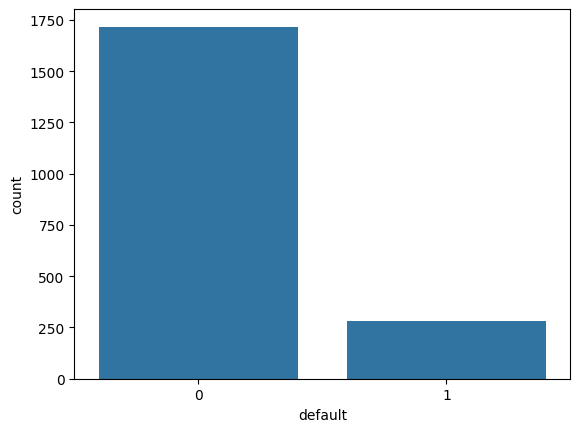

In [ ]:
sns.countplot(x = base_credit['default']);

### Avalie quais fatores mais influenciam a decisão final.

#### Income (Renda), Age (Idade) e Loan (Empréstimo), são os fatores que mais influenciam na decisão final, pois são as variáveis com maior correlação ao risco de inadimplência.

## 5 - Relação entre Idade e Aprovação de Crédito

Analise se existe uma faixa etária com maior dificuldade para obter crédito.
Utilize boxplots para visualizar essa relação.

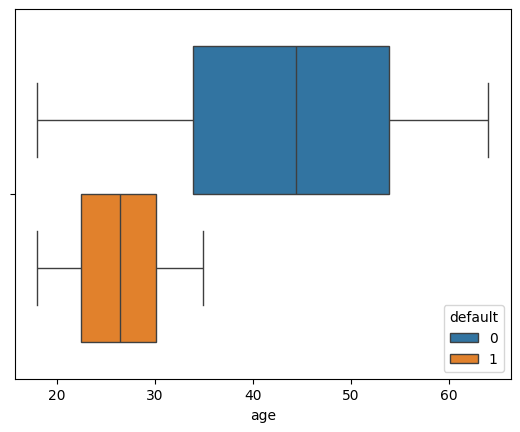

In [ ]:
sns.boxplot(data=base_credit, x='age', hue='default');

## 6 - Impacto da Renda no Score de Crédito

#### Verifique se há uma relação direta entre renda e pontuação de crédito. Utilize scatter plots para representar a tendência.


<Axes: xlabel='income', ylabel='default'>

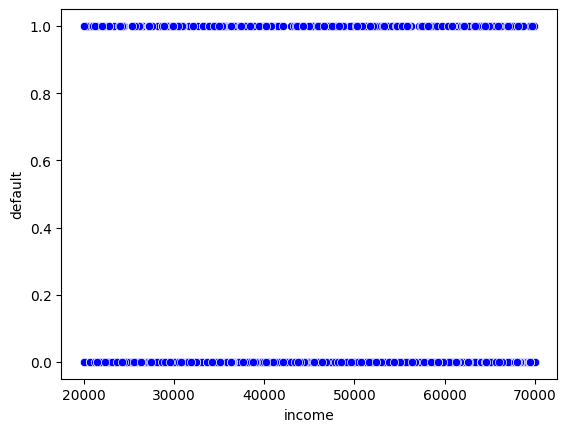

In [ ]:
sns.scatterplot(data=base_credit, x='income', y='default', color='blue')

## 8 - Tempo de Histórico de Crédito e Aprovação

### Existe um número mínimo de anos de histórico de crédito para aprovação? Analise essa relação usando gráficos de dispersão.


<Axes: xlabel='age', ylabel='default'>

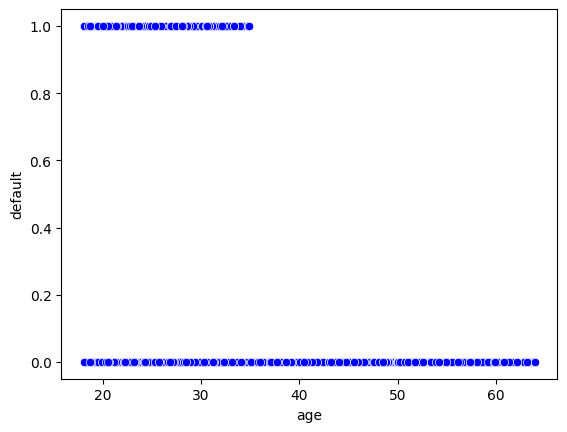

In [ ]:
sns.scatterplot(data=base_credit, x='age', y='default', color='blue')

## 9 - Endividamento e Score de Crédito

### Pessoas com maior endividamento têm pontuações de crédito mais baixas? Utilize gráficos de dispersão e histogramas para validar essa hipótese.

<Axes: xlabel='loan', ylabel='default'>

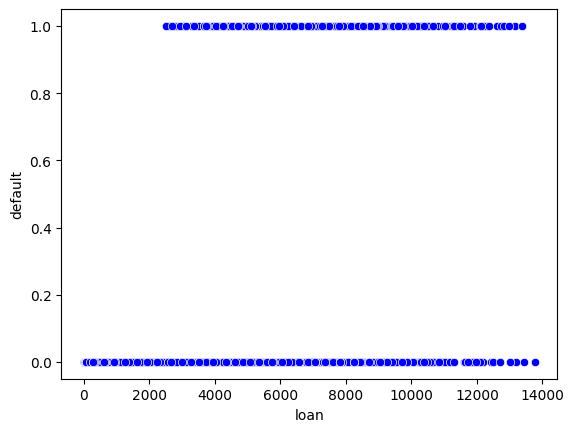

In [ ]:
sns.scatterplot(data=base_credit, x='loan', y='default', color='blue')

<Axes: xlabel='loan', ylabel='Count'>

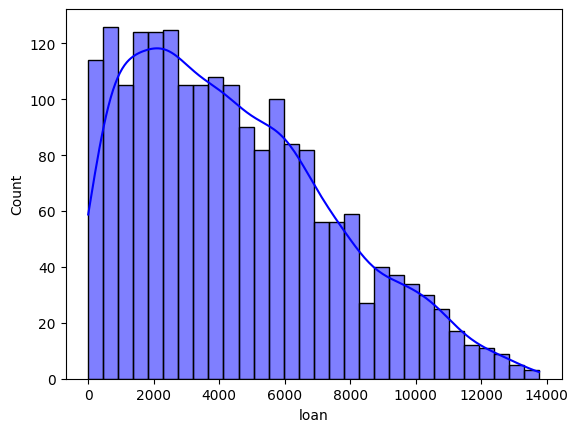

In [ ]:
sns.histplot(base_credit['loan'], bins=30, kde=True, color='blue')

<Axes: xlabel='default', ylabel='Count'>

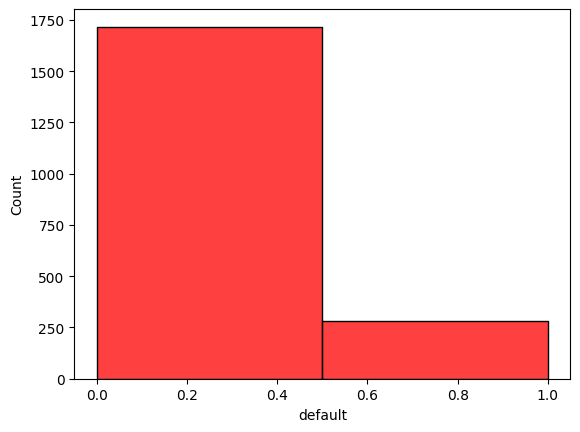

In [ ]:
sns.histplot(base_credit['default'], bins=2, kde=False, color='red')

## 10 - Conclusões e Recomendações para Modelagem

### Com base nos insights obtidos, quais variáveis parecem mais relevantes para um modelo de aprendizado de máquina?

#### As seguintes variáveis se destacam para um modelo de aprendizado de máquina:
*   Loan (Endividamento), as análises mostram que quanto mais envididada a pessoa é, menor as chances dela pagar um empréstimo;
*   Income (Renda), pessoas com rendas mais altas podem ter maior capacidade de pagar suas dívidas;
*   Age (Idade), pessoas mais jovens podem ter menos experiência de crédito e maior risco de inadimplência, enquanto pessoas mais velhas podem ter uma pontuação de crédito mais alta devido ao histórico mais longo de crédito




### Há necessidade de engenharia de features ou tratamento de dados para melhorar a qualidade do modelo?

#### Sim. É essencial realizar os seguintes tratamentos para melhorar o desempenho e a qualidade dos dados:

*   Tratamento de dados faltantes e outliers;
*   Normalização ou padronização das variáveis numéricas;
*   Criação de novas features;
*   Divisão dos dados em treino e teste de forma adequada.

